In [1]:
#Analyses d'un exercice de plaqué au football de divers équipes selon 10 critères

import pandas as pd #bouger les données (dataframe)
import xlwings as xw #importer le excel



#on doit insérer certains paramètres aux endroits écrits en rouge
fichier= r'votre fichier'


wb = xw.Book(fichier) #ici, on doit insérer le lien  du document à importer
sheet = wb.sheets['Sheet1'] #ici, le nom de l'onglet

data = sheet['A1:J345'].options(pd.DataFrame, index=False, header=True).value #on indique la plage de cellules à extraire (et d'autres options)
data#on l'imprime


,ID/Criteria,A,B,C,D,E,F,G,H,I
0,50a,None,None,1,1,1,1,None,None,1
1,50b,1,1,1,1,None,None,1,None,1
2,51a,None,None,None,1,1,1,None,None,None
3,51b,None,None,None,1,1,1,None,None,None
4,52a,None,1,None,None,1,1,1,None,None
...,...,...,...,...,...,...,...,...,...,...
339,40b,1,1,None,1,None,None,1,None,1
340,41a,nan,nan,nan,nan,nan,nan,nan,nan,nan
341,41b,1,1,None,1,None,None,1,None,1
342,42a,None,1,1,1,1,1,None,None,1


In [2]:
lscore=[]  #listes utilisées pour faciliter la transformation du tableau, correspond aux colonnes ajoutées
lgroupe=[]
lcote=[]
score=0  #variables du score (par défaut)
groupe=1  #variable du groupe (par défaut)
i=0  #incrémenteur pour rangéees
j=1  #incrémenteur pour colonnes

df=data.copy(deep=True) #on fait une copie du tableau initial pour les transformations


while i<(len(df)):
    while j<(len(df.columns)):
        if df.iloc[i,j]=='nan':#on enlève les rangées où il y a une valeur 'nan'
            df.drop(df.index[i], inplace=True)
            j=1
            score=0
        elif df.iloc[i,j]!=1:
            df.iloc[i,j]=0
            j+=1
        else:
            score+=1
            j+=1
    lscore.append(score) #on ajoute le score
    j=1
    score=0
    if (int((df.iloc[i,0])[0:-1]))<(int((df.iloc[i-1,0])[0:-1])): #on indique lorsqu'on change de groupe
        groupe+=1
    lgroupe.append(groupe)
    if (df.iloc[i,0])[-1]  in ('b','B'): #on indique le côté
        lcote.append('Gauche')
    elif (df.iloc[i,0])[-1]  in ('a','A'):
        lcote.append('Droite')
    else:
        lcote.append('Non défini')
    df.iloc[i-1,0]=df.iloc[i-1,0][0:-1]
    i+=1

df['Côté']=lcote 
df['Groupe']=lgroupe
df['Score']=lscore
df=df.set_index(df.columns[0])
df.iloc[-1,-3]='Gauche'
df.iloc[-1,-2]=4

dic_type={}
i=0
while i<len(df.columns)-3:
    dic_type[df.columns[i]]='float'
    i+=1
df = df.astype(dic_type)
df

,A,B,C,D,E,F,G,H,I,Côté,Groupe,Score
ID/Criteria,,,,,,,,,,,,
50,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,Droite,1,5
50,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,Gauche,1,6
51,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Droite,1,3
51,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Gauche,1,3
52,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Droite,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
40,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Droite,4,8
40,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Gauche,4,5
41,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Gauche,4,5


In [3]:
def calculate_lift(a,b): #création de la fonction pour calculer le lift
    pa=0
    pb=0
    na=0
    nb=0
    if a==b:
        return float("Nan")
    else:
        for i in range(len(df)) : #on compte le nombre de fois que la variable a et b arrivent
            if df.iloc[i,a]==1 and df.iloc[i,b]==1:
                pa+=1
                pb+=1
                nb+=1
            elif df.iloc[i,a]!=1 and df.iloc[i,b]==1:
                nb+=1  
            elif df.iloc[i,a]==1 and df.iloc[i,b]!=1:
                pa+=1
            na+=1
        if nb<10: #contraintes de taille d'échantillon pour la variable B, ON PEUT REMPLACER LE 1 PAR LA TAILLE MINIMALE SOUHAITÉE POUR LA VARIABLE B
            return 'Pas assez de données'
        else:    
            return ((pb/nb)/(pa/na)) #on renvoie la réponse selon le calcul du lift

print (calculate_lift(8,8)) #test
print (calculate_lift(8,7))

nan
1.0278514588859418


In [4]:
tableau_lift = pd.DataFrame(columns = list(df.columns.values)[0:-3], index = list(df.columns.values)[0:-3])#on crée le tableau vide
tableau_lift

,A,B,C,D,E,F,G,H,I
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#On remplit le tableau 
i=0
j=0
while j<len(tableau_lift):
    tableau_lift.iloc[i,j] = calculate_lift(i,j)
    if i<len(tableau_lift)-1:
        i+=1
    else:
        j+=1
        i=0
tableau_lift
        



,A,B,C,D,E,F,G,H,I
A,NaN,1.07319,0.868804,1.04778,0.870135,0.984545,1.07669,1.01375,1.0638
B,1.07319,NaN,1.01185,1.00478,0.974042,0.976244,1.01637,1.06803,1.01325
C,0.868804,1.01185,NaN,1.01513,0.898314,0.976215,0.900663,0.898314,0.988427
D,1.04778,1.00478,1.01513,NaN,0.994854,1.02609,1.03169,1.06591,1.00097
E,0.870135,0.974042,0.898314,0.994854,NaN,0.990485,0.868644,1.27791,0.992219
F,0.984545,0.976244,0.976215,1.02609,0.990485,NaN,0.95767,0.973407,0.989628
G,1.07669,1.01637,0.900663,1.03169,0.868644,0.95767,NaN,1.71443,1.02006
H,1.01375,1.06803,0.898314,1.06591,1.27791,0.973407,1.71443,NaN,1.02785
I,1.0638,1.01325,0.988427,1.00097,0.992219,0.989628,1.02006,1.02785,NaN


In [6]:
i=0
j=1
v=[]
x=[]
y=[]



while i<(len(tableau_lift)):
    while j<(len(tableau_lift.columns)):
        x.append(tableau_lift.columns[j])
        y.append(tableau_lift.index[i])
        v.append(tableau_lift.iloc[i,j])
        j+=1
    i+=1
    j=i+1

dictlift = {'x': x, 'y': y, 'Lift': v}  
lift2 = pd.DataFrame(dictlift) 
lift2=lift2.sort_values(by=['Lift'], ascending=False)
moy=lift2['Lift'].mean(axis=0, skipna=True)
ect=lift2['Lift'].std(axis=0, skipna=True)
lrang=[]
ldiff=[]
i=0
r=len(lift2)
b=1
while i<len(lift2):
    if i==0:
        r=r
    elif lift2.iloc[i,-1]==lift2.iloc[i-1,-1]:
        b+=1
    else:
        r=r-b
        b=1
    lrang.append(int(r/len(lift2)*100))
    ldiff.append(abs((lift2.iloc[i,-1])-moy)/ect)
    i+=1 
print(len(lift2), len(lrang), lrang, moy, ect)
lift2['Rang Percentile']=lrang
lift2['P-Value']=ldiff
lift2




36 36 [100, 97, 94, 91, 88, 86, 83, 80, 77, 75, 72, 69, 66, 63, 61, 58, 55, 52, 50, 47, 44, 41, 38, 36, 33, 30, 27, 25, 22, 19, 16, 13, 13, 8, 5, 2] 1.0186705322992735 0.14065023782918187


,x,y,Lift,Rang Percentile,P-Value
33,H,G,1.714429,100,4.946731
28,H,E,1.277909,97,1.843145
5,G,A,1.076695,94,0.412543
0,B,A,1.073188,91,0.387607
13,H,B,1.068028,88,0.350924
24,H,D,1.065915,86,0.335898
7,I,A,1.063801,83,0.320873
2,D,A,1.047780,80,0.206963
23,G,D,1.031687,77,0.092542
35,I,H,1.027851,75,0.065275


In [8]:
tableau_diff = pd.DataFrame(columns = ('Fréquence','Avec','Sans', 'Différence-1', 'Diff*Freq'), index = list(df.columns.values)[0:-3]) #on crée le tableau
tableau_diff

,Fréquence,Avec,Sans,Différence-1,Diff*Freq
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN


In [9]:
def calculate_score_with(a):   #on crée les fonctions pour créer le variables
    s=0
    n=0
    for i in range(len(df)) : 
        if df.iloc[i,a]==1:
            s=s+df.iloc[i,-1]
            n=n+1         
    return (s/n)

def calculate_score_without(a): 
    s=0
    n=0
    for i in range(len(df)) : 
        if df.iloc[i,a]!=1:
            s=s+df.iloc[i,-1]
            n=n+1            
    return (s/n)
def calculate_freq(a):
    s=0
    n=0
    for i in range(len(df)) : 
        if df.iloc[i,a]==1:
            s+=1
        n+=1         
    return (s/n)
    
    

In [10]:
i=0# on remplit le tableau
while i<len(tableau_diff):
        tableau_diff.iloc[i,0] = round(calculate_freq(i),2)
        tableau_diff.iloc[i,1] = round(calculate_score_with(i),2)
        tableau_diff.iloc[i,2] = round(calculate_score_without(i),2)
        tableau_diff.iloc[i,3] = tableau_diff.iloc[i,1]-tableau_diff.iloc[i,2]-1
        tableau_diff.iloc[i,4] = tableau_diff.iloc[i,0]*(tableau_diff.iloc[i,3])
        i+=1

tableau_diff

        

,Fréquence,Avec,Sans,Différence-1,Diff*Freq
A,0.61,6,4.85,0.15,0.0915
B,0.9,5.69,4.24,0.45,0.405
C,0.43,5.92,5.27,-0.35,-0.1505
D,0.83,5.8,4.34,0.46,0.3818
E,0.57,5.77,5.25,-0.48,-0.2736
F,0.75,5.74,4.96,-0.22,-0.165
G,0.45,6.11,5.09,0.02,0.009
H,0.08,7.04,5.43,0.61,0.0488
I,0.94,5.66,3.95,0.71,0.6674


AxesSubplot(0.125,0.125;0.775x0.755)


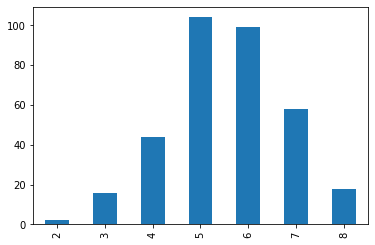

In [11]:
tableau_score=df['Score'].value_counts(sort=False) #tableau représentant le nombre d'essai selon le score qu'ils ont eu
print(tableau_score.plot(kind='bar'))


In [12]:
dic_agg={}
i=0
while i<len(df.columns):
    dic_agg[df.columns[i]]='mean' #moyenne des essais pour chaque variable
    i+=1
substract=lambda x:max(x)-min(x) #différence de score entre les deux essais
dic_agg['Côté']='count' # nombre d'essais
dic_agg['Score']= ['mean', substract] #moyenne des essais
gb=df.groupby(['Groupe', 'ID/Criteria']).agg(dic_agg)


i=0  #incrémenteur pour rangéees
j=0  #incrémenteur pour colonnes
diff=0
ldiff=[]
while i<(len(gb)):
    if gb.iloc[i,-3]!=2:
        gb.drop(gb.index[i], inplace=True)
    while j<(len(gb.columns)-2):
        if gb.iloc[i,j]==0.5:
            diff+=1
        j+=1
    ldiff.append(diff)
    diff=0
    j=0
    i+=1
print (len(ldiff))
print (len(gb))
print (gb.iloc[1,3])

gb['Différence']=ldiff  #
col=[]
i=0
while i<len(df.columns)-3:
    col.append(df.columns[i])
    i+=1
col.append('Essais')
col.append('Score')
col.append('Différence')
col.append('Variation')
print(col)
gb.columns=col
gb

168
168
1.0
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Essais', 'Score', 'Différence', 'Variation']


A    B    C    D    E    F    G    H    I  Essais  \
Groupe ID/Criteria                                                        
1      50           0.5  0.5  1.0  1.0  0.5  0.5  0.5  0.0  1.0       2   
       51           0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0       2   
       52           0.0  1.0  0.0  0.5  0.5  1.0  1.0  0.0  0.0       2   
       53           1.0  1.0  0.5  1.0  0.5  0.0  0.5  0.0  1.0       2   
       54           0.5  0.5  0.0  1.0  0.5  1.0  0.0  0.0  1.0       2   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
4      5            0.0  1.0  0.0  1.0  0.5  0.0  1.0  0.0  1.0       2   
       6            0.5  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0       2   
       7            1.0  1.0  1.0  1.0  0.5  1.0  1.0  0.0  1.0       2   
       8            1.0  1.0  0.5  1.0  1.0  0.5  1.0  0.0  1.0       2   
       9            0.0  1.0  1.0  1.0  0.5  1.0  0.0  0.0  0.5       2   

                    Score  Différence  Variation  
Groupe ID/Criteria                                
1      50             5.5           1          5  
       51             3.0           0          0  
       52             4.0           0          2  
       53             5.5           1          3  
       54             4.5           1          3  
...                   ...         ...        ...  
4      5              4.5           1          1  
       6              7.5           1          1  
       7              7.5           1          1  
       8              7.0           2          2  
       9              5.0           2          2  

[168 rows x 13 columns]

In [222]:
df.to_excel('C:/Users/benoi/Documents/ENK/TableauEssais.xlsx')

In [ ]:
gb.to_excel('C:/Users/benoi/Documents/ENK/TableauJoueurs.xlsx')

Groupe
1    5.022222
2    5.526316
3    5.703704
4    6.064103
Name: Score, dtype: float64

 Côté
Droite    5.588235
Gauche    5.508772
Name: Score, dtype: float64

 Différence
0    43
1    78
2    35
3    11
4     1
Name: Différence, dtype: int64

 Variation
0    13
1    40
2    53
3    44
4    13
5     5
Name: Variation, dtype: int64

 Différence   0   1   2  3  4
Variation                   
0           13   0   0  0  0
1            0  40   0  0  0
2           28   0  25  0  0
3            0  35   0  9  0
4            2   0  10  0  1
5            0   3   0  2  0

 A             0.607143
B             0.898810
C             0.425595
D             0.827381
E             0.574405
F             0.750000
G             0.449405
H             0.077381
I             0.934524
Essais        2.000000
Score         5.544643
Différence    1.101190
Variation     2.113095
dtype: float64

 A             0.409991
B             0.241995
C             0.450016
D             0.319000
E             0.26

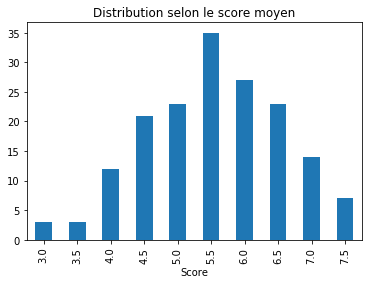

In [13]:
gbgroup=gb.groupby("Groupe")["Score"].mean()#Tableau de la moyenne de chaque groupe
print (gbgroup)

gbcote=df.groupby("Côté")["Score"].mean() #Tableau du score moyen selon le côté
print ("\n", gbcote)

gbdiff=gb.groupby("Différence")["Différence"].count() #Tableau du nombre de gens pour chaque différence
print ("\n", gbdiff)

gbvar=gb.groupby("Variation")["Variation"].count() #Tableau du score moyen selon le côté
print ("\n", gbvar)

cross=pd.crosstab(gb.Variation,gb.Différence)#Tableau pour observer la corrélation entre la variation et la différence
print("\n", cross)

tableau_moyennes=gb.mean()
print("\n", tableau_moyennes)

tableau_ecart=gb.std()
print ("\n", tableau_ecart)

gbscore=gb.groupby("Score")["Score"].count()#Tableau du classement des joueurs selon leurs scores moyens
print (gbscore.plot(kind ='bar', title='Distribution selon le score moyen'))



[[4.  4.  8.  ... 0.  8.  5.5]
 [0.  0.  0.  ... 0.  0.  3. ]
 [0.  8.  0.  ... 0.  0.  4. ]
 ...
 [8.  8.  8.  ... 0.  8.  7.5]
 [8.  8.  4.  ... 0.  8.  7. ]
 [0.  8.  8.  ... 0.  4.  5. ]]


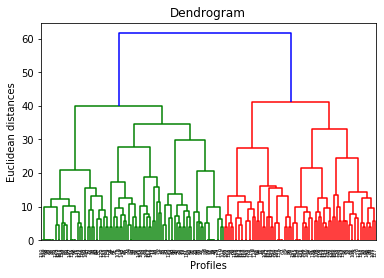

In [14]:
ww=8 #Ici 8 ici représente le poids que je mets aux variables par rapport au score pour compenser et mettre de l'emphase
test=gb.iloc[:, 0:-2] 
test=test.drop(columns='Essais')
test.iloc[:,0:-1]=ww*test.iloc[:,0:-1] 
X=test.values
print(X)

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#on crée ici un den drogram qui nous aide a voir comment les données sont distribuées
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Profiles')
plt.ylabel('Euclidean distances')
plt.show()

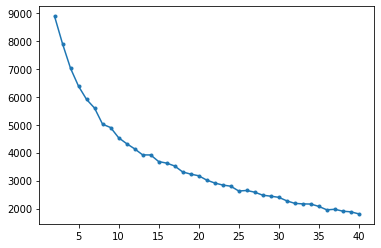

In [15]:
from sklearn.cluster import KMeans #on importe les bibliothèques nécessaires
cluster_min=2
cluster_max=40
cl=cluster_min
dic_cluster={}
while cl<=cluster_max:
    cluster = KMeans(n_clusters=cl) #on  crée le cluster
    cluster.fit_predict(X)
    maxvar=cluster.fit(X).score(X)#on regarde la variation
    dic_cluster[cl]=abs(maxvar)
    cl+=1
elbow=pd.DataFrame.from_dict(dic_cluster, orient='index')
plt.plot(elbow, marker='.')




{2: 2.1976061382729206, 3: 2.014859221283153, 4: 1.8792241921861415, 5: 1.8307488499810733, 6: 1.7635697819503704, 7: 1.626086013716213, 8: 1.6160419353199071, 9: 1.5453443241235454, 10: 1.499018319101079, 11: 1.4436582794068322, 12: 1.3995127865345414, 13: 1.3153240585282735, 14: 1.3088186361124294, 15: 1.231112171577048, 16: 1.209211618613167, 17: 1.1516415680548595, 18: 1.0802388389457913, 19: 1.0507691707636622, 20: 1.0457383768689845, 21: 1.0289974357314737, 22: 1.0047922411527812, 23: 0.9828778591131905, 24: 0.9448704147228887, 25: 0.9280730688738902, 26: 0.904886534570042, 27: 0.9020972124904033, 28: 0.8952506267015348, 29: 0.8755505759128503, 30: 0.8572786965341548}


,0
2,2.197606
3,2.014859
4,1.879224
5,1.830749
6,1.763570
7,1.626086
8,1.616042
9,1.545344
10,1.499018
11,1.443658


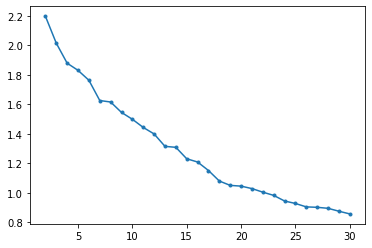

In [16]:
from sklearn.cluster import AgglomerativeClustering #on importe les bibliothèques nécessaires
cluster_min=2
cluster_max=30
cl=2 #le nombre minimal de clusters
dic_cluster={}
while cl<=cluster_max:
    cluster = AgglomerativeClustering(n_clusters=cl, affinity='euclidean', linkage='ward') #on  crée letype de cluster
    cluster.fit_predict(X)
    test['Profil']=cluster.labels_#on l'ajoute au tableau
    testcluster=test.groupby("Profil").std() #on regroupe les classes selon la variabilité (pour choisir le nombre de clusters)
    i=0
    j=0
    somme=0
    while i<(len(testcluster)):
        while j<(len(testcluster.columns)):
            somme=somme + testcluster.iloc[i,j]
            j+=1
        i+=1
        j=0
    moyenne=somme/(len(testcluster)*len(testcluster.columns))
    dic_cluster[cl]=moyenne
    cl+=1
print (dic_cluster)
    
elbow=pd.DataFrame.from_dict(dic_cluster, orient='index')
plt.plot(elbow, marker='.')

elbow

In [17]:
cluster_min=2
cluster_max=30
i=0
dist=[]
a=(elbow.iloc[-1,0]-elbow.iloc[0,0])/(len(elbow)-1)
b=-1
c=elbow.iloc[0,0]-a*cluster_min
while i<=cluster_max-cluster_min:
    xi=elbow.index[i]
    yi=elbow.iloc[i,0]
    d= (a*xi+b*yi+c) / ((a**2+b**2)**(1/2))
    dist.append(d)
    i+=1
elbow['Distance']=dist
maxim=0
i=0
for i in range (len(elbow)):
    if elbow.iloc[i,1]>maxim:
        maxim=elbow.iloc[i,1]
        cluster_optimal=i+cluster_min
print (cluster_optimal, maxim)
elbow
    
    

13 0.35531801103986493


,0,Distance
2,2.197606,0.000000
3,2.014859,0.134724
4,1.879224,0.222390
5,1.830749,0.222995
6,1.763570,0.242284
7,1.626086,0.331796
8,1.616042,0.294015
9,1.545344,0.316817
10,1.499018,0.315276
11,1.443658,0.322759


In [20]:
cluster = AgglomerativeClustering(n_clusters=cluster_optimal, affinity='euclidean', linkage='ward') #on  crée letype de cluster
cluster.fit_predict(X)
gb['Profil']=cluster.labels_#on l'ajoute au tableau
gb


A    B    C    D    E    F    G    H    I  Essais  \
Groupe ID/Criteria                                                        
1      50           0.5  0.5  1.0  1.0  0.5  0.5  0.5  0.0  1.0       2   
       51           0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0       2   
       52           0.0  1.0  0.0  0.5  0.5  1.0  1.0  0.0  0.0       2   
       53           1.0  1.0  0.5  1.0  0.5  0.0  0.5  0.0  1.0       2   
       54           0.5  0.5  0.0  1.0  0.5  1.0  0.0  0.0  1.0       2   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
4      5            0.0  1.0  0.0  1.0  0.5  0.0  1.0  0.0  1.0       2   
       6            0.5  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0       2   
       7            1.0  1.0  1.0  1.0  0.5  1.0  1.0  0.0  1.0       2   
       8            1.0  1.0  0.5  1.0  1.0  0.5  1.0  0.0  1.0       2   
       9            0.0  1.0  1.0  1.0  0.5  1.0  0.0  0.0  0.5       2   

                    Score  Différence  Variation  Profil  
Groupe ID/Criteria                                        
1      50             5.5           1          5       8  
       51             3.0           0          0       1  
       52             4.0           0          2       0  
       53             5.5           1          3       2  
       54             4.5           1          3       1  
...                   ...         ...        ...     ...  
4      5              4.5           1          1       0  
       6              7.5           1          1       7  
       7              7.5           1          1      10  
       8              7.0           2          2      10  
       9              5.0           2          2       3  

[168 rows x 14 columns]

               A         B         C         D         E         F         G  \
Profil                                                                         
0       0.250000  0.958333  0.041667  0.625000  0.583333  0.416667  0.791667   
1       0.166667  0.700000  0.100000  0.900000  0.666667  0.866667  0.066667   
2       0.882353  1.000000  0.823529  0.823529  0.500000  0.205882  0.323529   
3       0.083333  0.722222  0.944444  0.777778  0.500000  0.972222  0.027778   
4       0.100000  1.000000  1.000000  0.600000  0.500000  0.000000  0.800000   
5       1.000000  0.976190  0.023810  1.000000  0.595238  0.928571  0.785714   
6       0.800000  0.966667  0.133333  0.200000  0.433333  0.866667  0.266667   
7       0.461538  0.692308  0.038462  0.961538  0.653846  1.000000  0.923077   
8       0.781250  0.937500  0.812500  1.000000  0.625000  0.968750  0.125000   
9       0.166667  0.944444  0.888889  0.833333  0.611111  0.944444  0.888889   
10      0.954545  1.000000  0.863636  1.

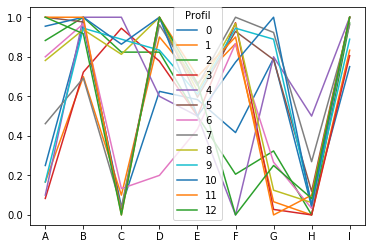

In [21]:
moy=gb.groupby("Profil").mean()#on peut ici y observer les tendances de chacun des groupes
var=gb.groupby("Profil").std() #on peut ici y observer les écarts-type selon les groupes (utiles pour déterminer le nombre de classes optimale)
nbs=gb.groupby("Profil").count()#on peut ici y observer la distribution de chacun des groupes, pour vérifier si les groupes sont distribués de manière assez égales
graph_moy=moy.iloc[:,0:-4].transpose()
print (moy)
print (var)
print (nbs.iloc[:,0:1])
print (graph_moy.plot())

In [22]:
gb=gb.sort_values(by=['Score'], ascending=False)
lrang=[]
i=0
r=len(gb)
b=1
while i<len(gb):
    if i==0:
        r=r
    elif gb.iloc[i,-4]==gb.iloc[i-1,-4]:
        b+=1
    else:
        r=r-b
        b=1
    lrang.append(int(r/len(gb)*100))
    i+=1
print(len(gb), len(lrang), lrang)
gb['Rang Percentile']=lrang
gb=gb.sort_values(by=['Groupe','ID/Criteria'], ascending=True)
gb



168 168 [100, 100, 100, 100, 100, 100, 100, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 1, 1, 1]


A    B    C    D    E    F    G    H    I  Essais  \
Groupe ID/Criteria                                                        
1      50           0.5  0.5  1.0  1.0  0.5  0.5  0.5  0.0  1.0       2   
       51           0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0       2   
       52           0.0  1.0  0.0  0.5  0.5  1.0  1.0  0.0  0.0       2   
       53           1.0  1.0  0.5  1.0  0.5  0.0  0.5  0.0  1.0       2   
       54           0.5  0.5  0.0  1.0  0.5  1.0  0.0  0.0  1.0       2   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
4      5            0.0  1.0  0.0  1.0  0.5  0.0  1.0  0.0  1.0       2   
       6            0.5  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0       2   
       7            1.0  1.0  1.0  1.0  0.5  1.0  1.0  0.0  1.0       2   
       8            1.0  1.0  0.5  1.0  1.0  0.5  1.0  0.0  1.0       2   
       9            0.0  1.0  1.0  1.0  0.5  1.0  0.0  0.0  0.5       2   

                    Score  Différence  Variation  Profil  Rang Percentile  
Groupe ID/Criteria                                                         
1      50             5.5           1          5       8               57  
       51             3.0           0          0       1                1  
       52             4.0           0          2       0               10  
       53             5.5           1          3       2               57  
       54             4.5           1          3       1               23  
...                   ...         ...        ...     ...              ...  
4      5              4.5           1          1       0               23  
       6              7.5           1          1       7              100  
       7              7.5           1          1      10              100  
       8              7.0           2          2      10               95  
       9              5.0           2          2       3               36  

[168 rows x 15 columns]

In [23]:
lranggr=[]
i=0
gb=gb.reset_index()
groupcount=gb.groupby("Groupe")["Groupe"].count()#Tableau du nombre de joueurs par groupe
r=groupcount.loc[gb.iloc[i,0]]
b=1
gb=gb.sort_values(by=['Groupe','Score'], ascending=[True, False])
while i<len(gb):
    if i==0:
        r=r
    elif gb.iloc[i,0]!=gb.iloc[i-1,0]:
        r=groupcount.loc[gb.iloc[i,0]]
    elif gb.iloc[i,-4]==gb.iloc[i-1,-4]:
        b+=1
    else:
        r=r-b
        b=1
    lranggr.append(int(r/groupcount.loc[gb.iloc[i,0]]*100))
    i+=1
print(len(gb), len(lranggr), lranggr)
gb['Rang Percentile Groupe']=lranggr
gb=gb.sort_values(by=['Groupe','ID/Criteria'], ascending=True)
gb


168 168 [100, 100, 95, 93, 91, 91, 86, 86, 82, 82, 82, 82, 82, 82, 82, 82, 82, 62, 60, 60, 55, 53, 53, 53, 46, 46, 42, 42, 37, 37, 37, 37, 37, 37, 37, 37, 37, 17, 15, 15, 15, 8, 8, 8, 2, 100, 100, 100, 94, 92, 91, 91, 91, 91, 91, 91, 91, 91, 91, 75, 73, 71, 70, 70, 70, 64, 63, 61, 61, 57, 57, 57, 57, 57, 49, 49, 45, 45, 42, 40, 40, 40, 35, 33, 33, 33, 33, 33, 24, 22, 21, 21, 21, 21, 21, 21, 10, 10, 7, 5, 5, 5, 100, 100, 85, 81, 77, 74, 70, 66, 62, 62, 55, 51, 51, 51, 40, 40, 40, 40, 40, 40, 18, 18, 11, 11, 3, 0, -3, 100, 100, 100, 100, 89, 87, 87, 87, 87, 87, 74, 71, 71, 71, 64, 61, 61, 61, 53, 51, 48, 48, 43, 43, 38, 35, 35, 30, 28, 28, 28, 20, 17, 15, 12, 12, 12, 5, 5]


,Groupe,ID/Criteria,A,B,C,D,E,F,G,H,I,Essais,Score,Différence,Variation,Profil,Rang Percentile,Rang Percentile Groupe
0,1,50,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.0,1.0,2,5.5,1,5,8,57,82
1,1,51,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2,3.0,0,0,1,1,8
2,1,52,0.0,1.0,0.0,0.5,0.5,1.0,1.0,0.0,0.0,2,4.0,0,2,0,10,17
3,1,53,1.0,1.0,0.5,1.0,0.5,0.0,0.5,0.0,1.0,2,5.5,1,3,2,57,82
4,1,54,0.5,0.5,0.0,1.0,0.5,1.0,0.0,0.0,1.0,2,4.5,1,3,1,23,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,4,5,0.0,1.0,0.0,1.0,0.5,0.0,1.0,0.0,1.0,2,4.5,1,1,0,23,12
164,4,6,0.5,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2,7.5,1,1,7,100,100
165,4,7,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,2,7.5,1,1,10,100,100
166,4,8,1.0,1.0,0.5,1.0,1.0,0.5,1.0,0.0,1.0,2,7.0,2,2,10,95,74


In [24]:
print((dfgr.loc[gbgr.iloc[5,1]]).iloc[:,0:-3])


NameError: name 'dfgr' is not defined

In [38]:
import xlsxwriter
group=1
gbgr= gb[gb['Groupe']==group]
dfgr= df[df['Groupe']==group]
dfgr.index = dfgr.index.astype(str)
gbgr['ID/Criteria'] = gbgr['ID/Criteria'].astype(str)
colo=list(dfgr.columns)[0:-3]

workbook = xlsxwriter.Workbook('C:/Users/benoi/Documents/ENK/Analyses par joueurs.xlsx')
format_title = workbook.add_format({'bold': True, 'font_color': 'black'})
format_res = workbook.add_format({'bold': False, 'font_color': 'black'})


i=0
while i<len(gbgr):
    df_player=(dfgr.loc[gbgr.iloc[i,1]])
    worksheet = workbook.add_worksheet(gbgr.iloc[i,1])
    worksheet.write(0, 0, 'Nom', format_title)
    worksheet.write(0, 1, 'Âge', format_title)
    worksheet.write(0, 2, 'Position', format_title)
    worksheet.write(0, 8, 'Rang total', format_title)
    worksheet.write(0, 9, 'Rang par groupe', format_title)
    worksheet.write(0, 10, 'Rang par position', format_title)
    worksheet.write(3, 0, 'Performance', format_title)
    worksheet.write(8, 0, 'Analyse', format_title)
    worksheet.write(4, 10, 'Score', format_title)
  

    worksheet.write(1, 0, gbgr.index[i], format_res)
    worksheet.write(1, 1, 'N/D', format_res)
    worksheet.write(1, 2, 'N/D', format_res)
    worksheet.write(1, 8, gbgr.iloc[i,-2], format_res)
    worksheet.write(1, 9, gbgr.iloc[i,-1], format_res)
    worksheet.write(1, 10, 'N/D', format_res)
    worksheet.write(5, 10, '=SUM(B6:J6)', format_res)
    worksheet.write(6, 10, '=SUM(B7:J7)', format_res)
    j=0
    while j<len(colo):
        worksheet.write(4, j+1, colo[j], format_title)
        worksheet.write(5, j+1, df_player.iloc[0,j], format_res)
        worksheet.write(6, j+1, df_player.iloc[1,j], format_res)
        j+=1
    worksheet.write(5, 0, df_player.iloc[0,j], format_title)
    worksheet.write(6, 0, df_player.iloc[1,j], format_title)     
    i+=1

workbook.close()
    
    
    
    
    
    
    


C:\Users\benoi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
list(dfgr.columns)[0:-3]

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [36]:
df_player

,A,B,C,D,E,F,G,H,I,Côté,Groupe,Score
ID/Criteria,,,,,,,,,,,,
50,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,Droite,1,5
50,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,Gauche,1,6


In [70]:
dfgr.loc['50']
print((gbgr.iloc[4,1]))

54


In [66]:
gbgr.iloc[i,1]

'50'

In [61]:
print (type(gb.index[3]))

<class 'numpy.int64'>
